In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

sd_census_data = "sdhousing_w_redfin_csv.csv"

sd_data = pd.read_csv(sd_census_data)
sd_data.head()

,zip,GEO_NAME,med_home_sale_1_12,med_home_sale_1_15,med_home_sale_1_18,pop_2011,pop_2014,pop_2017,med_hh_inc_11,med_hh_inc_14,...,total_units_17,ownocc_units_11,ownocc_units_14,ownocc_units_17,rent_units_11,rent_units_14,rent_units_17,median_gross_rent_11,median_gross_rent_14,median_gross_rent_17
0,91901,Alpine California,390.0,490.0,632.0,16606,18184,18238,77064,81379,...,17813,11259,12843,13642,4845,4939,4171,1274,1284,1397
1,91902,Bonita California,405.0,595.0,632.0,17399,19504,19762,78187,88926,...,19699,14192,15009,13997,3187,4447,5702,1462,1653,1777
2,91910,Chula Vista California,250.0,389.0,508.0,71887,76797,76250,56510,54640,...,75145,38566,37110,36004,32504,38753,39141,1137,1189,1298
3,91911,Chula Vista California,245.0,364.0,470.0,79518,83710,84025,48386,48891,...,83096,42313,41658,42151,36788,41399,40945,1154,1210,1359
4,91913,Chula Vista California,305.0,420.0,517.0,40633,43655,49346,89737,84741,...,49337,29091,31864,35928,11542,11786,13409,1831,1823,1947


In [5]:
# remove rows where med_hh_inc_11 = "-", this eliminates many other rows that lack data
sd_data_df = sd_data[sd_data.med_hh_inc_11 != "-"]
# reset the index
sd_data_df = sd_data_df.reset_index(drop=True) 
# verify rows deleted
print(len(sd_data_df))

81


In [6]:
# remove row where there is missing hh income in 2017, this also happens to be camp pendleton
sd_data_df2 = sd_data_df[sd_data_df.med_hh_inc_17 != "-"]
# verify row deleted
print(len(sd_data_df2))

80


In [7]:
# Rename the relevant columns to this graph
sd_data_df2 = sd_data_df2.rename(columns={"zip":"Zip",
                                  "pop_2011" : "2011 Population",
                                  "pop_2014" : "2014 Population",
                                  "pop_2017" : "2017 Population"})
sd_data_df2.head()

,Zip,GEO_NAME,med_home_sale_1_12,med_home_sale_1_15,med_home_sale_1_18,2011 Population,2014 Population,2017 Population,med_hh_inc_11,med_hh_inc_14,...,total_units_17,ownocc_units_11,ownocc_units_14,ownocc_units_17,rent_units_11,rent_units_14,rent_units_17,median_gross_rent_11,median_gross_rent_14,median_gross_rent_17
0,91901,Alpine California,390.0,490.0,632.0,16606,18184,18238,77064,81379,...,17813,11259,12843,13642,4845,4939,4171,1274,1284,1397
1,91902,Bonita California,405.0,595.0,632.0,17399,19504,19762,78187,88926,...,19699,14192,15009,13997,3187,4447,5702,1462,1653,1777
2,91910,Chula Vista California,250.0,389.0,508.0,71887,76797,76250,56510,54640,...,75145,38566,37110,36004,32504,38753,39141,1137,1189,1298
3,91911,Chula Vista California,245.0,364.0,470.0,79518,83710,84025,48386,48891,...,83096,42313,41658,42151,36788,41399,40945,1154,1210,1359
4,91913,Chula Vista California,305.0,420.0,517.0,40633,43655,49346,89737,84741,...,49337,29091,31864,35928,11542,11786,13409,1831,1823,1947


In [60]:
# Filter the data
sd_pop_df = sd_data_df2[["Zip","2011 Population","2014 Population","2017 Population"]]

# Set the "Zip" to be our index for easy referencing of rows
sd_pop_df = sd_pop_df.set_index("Zip")

sd_pop_df.head()

,2011 Population,2014 Population,2017 Population
Zip,,,
91901,16606,18184,18238
91902,17399,19504,19762
91910,71887,76797,76250
91911,79518,83710,84025
91913,40633,43655,49346


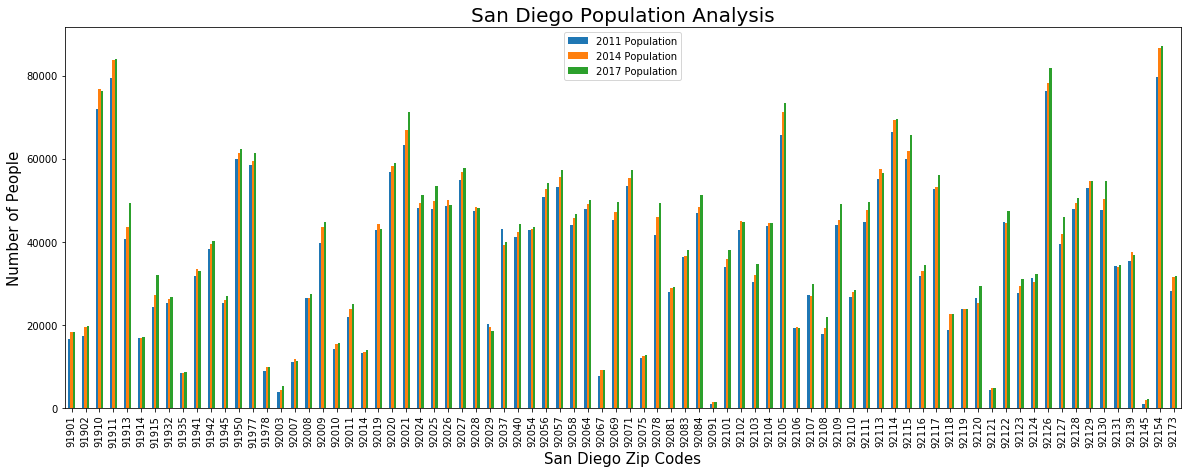

<Figure size 432x288 with 0 Axes>

In [9]:
# Use DataFrame.plot() to create a bar chart of the data
sd_pop_df.plot(kind="bar", figsize=(20,7))

# Set chart properties
plt.title("San Diego Population Analysis", fontsize=20)
plt.xlabel("San Diego Zip Codes", fontsize=15)
plt.ylabel("Number of People", fontsize=15)

plt.savefig("Images/SD_Population_Chart_2011-2017.png")

plt.show()
plt.tight_layout()

In [10]:
# Rename the relevant columns to this graph
sd_data_df2 = sd_data_df2.rename(columns={"med_hh_inc_11" : "2011 Median Income",
                                  "med_hh_inc_14" : "2014 Median Income",
                                  "med_hh_inc_17" : "2017 Median Income"})
sd_data.head()

,zip,GEO_NAME,med_home_sale_1_12,med_home_sale_1_15,med_home_sale_1_18,pop_2011,pop_2014,pop_2017,med_hh_inc_11,med_hh_inc_14,...,total_units_17,ownocc_units_11,ownocc_units_14,ownocc_units_17,rent_units_11,rent_units_14,rent_units_17,median_gross_rent_11,median_gross_rent_14,median_gross_rent_17
0,91901,Alpine California,390.0,490.0,632.0,16606,18184,18238,77064,81379,...,17813,11259,12843,13642,4845,4939,4171,1274,1284,1397
1,91902,Bonita California,405.0,595.0,632.0,17399,19504,19762,78187,88926,...,19699,14192,15009,13997,3187,4447,5702,1462,1653,1777
2,91910,Chula Vista California,250.0,389.0,508.0,71887,76797,76250,56510,54640,...,75145,38566,37110,36004,32504,38753,39141,1137,1189,1298
3,91911,Chula Vista California,245.0,364.0,470.0,79518,83710,84025,48386,48891,...,83096,42313,41658,42151,36788,41399,40945,1154,1210,1359
4,91913,Chula Vista California,305.0,420.0,517.0,40633,43655,49346,89737,84741,...,49337,29091,31864,35928,11542,11786,13409,1831,1823,1947


In [11]:
# Filter the DataFrame down only to those columns to chart
sd_income_df = sd_data_df2[["Zip","2011 Median Income","2014 Median Income","2017 Median Income"]]
sd_income_df = sd_income_df.astype(int)
sd_income_df.head()

,Zip,2011 Median Income,2014 Median Income,2017 Median Income
0,91901,77064,81379,90397
1,91902,78187,88926,92759
2,91910,56510,54640,59371
3,91911,48386,48891,52274
4,91913,89737,84741,87440


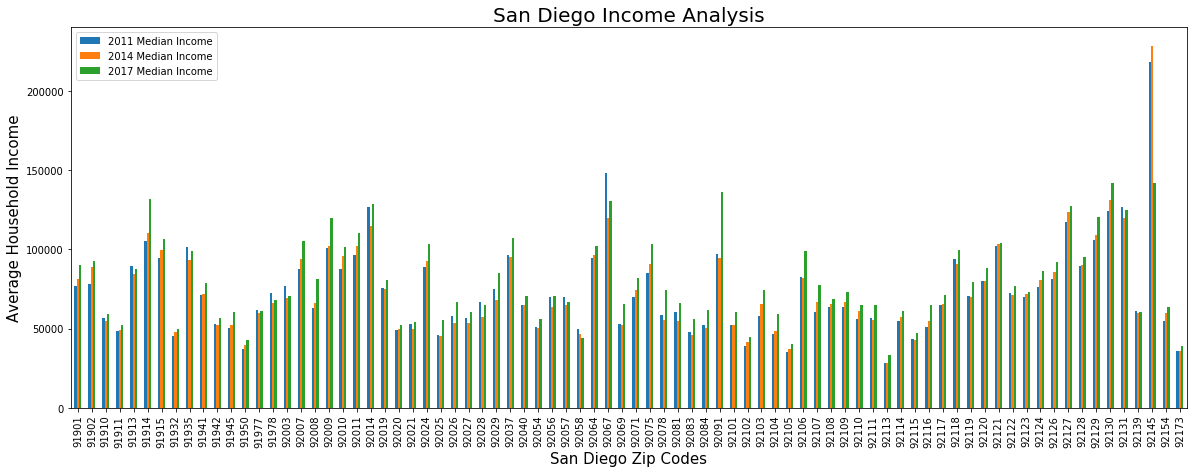

<Figure size 432x288 with 0 Axes>

In [12]:
# Set the index to be "Zip" so they will be used as labels
sd_income_df = sd_income_df.set_index("Zip")

# Use DataFrame.plot() to create a bar chart of the data
sd_income_df.plot(kind="bar", figsize=(20,7))

# Set chart properties
plt.title("San Diego Income Analysis", fontsize=20)
plt.xlabel("San Diego Zip Codes", fontsize=15)
plt.ylabel("Average Household Income", fontsize=15)

plt.savefig("Images/SD_Income_Chart_2011-2017.png")

plt.show()
plt.tight_layout()

In [13]:
# Rename the relevant columns to this graph
sd_data_df2 = sd_data_df2.rename(columns={"median_gross_rent_11" : "2011 Median Rent",
                                  "median_gross_rent_14" : "2014 Median Rent",
                                  "median_gross_rent_17" : "2017 Median Rent"})
sd_data_df2.head()

,Zip,GEO_NAME,med_home_sale_1_12,med_home_sale_1_15,med_home_sale_1_18,2011 Population,2014 Population,2017 Population,2011 Median Income,2014 Median Income,...,total_units_17,ownocc_units_11,ownocc_units_14,ownocc_units_17,rent_units_11,rent_units_14,rent_units_17,2011 Median Rent,2014 Median Rent,2017 Median Rent
0,91901,Alpine California,390.0,490.0,632.0,16606,18184,18238,77064,81379,...,17813,11259,12843,13642,4845,4939,4171,1274,1284,1397
1,91902,Bonita California,405.0,595.0,632.0,17399,19504,19762,78187,88926,...,19699,14192,15009,13997,3187,4447,5702,1462,1653,1777
2,91910,Chula Vista California,250.0,389.0,508.0,71887,76797,76250,56510,54640,...,75145,38566,37110,36004,32504,38753,39141,1137,1189,1298
3,91911,Chula Vista California,245.0,364.0,470.0,79518,83710,84025,48386,48891,...,83096,42313,41658,42151,36788,41399,40945,1154,1210,1359
4,91913,Chula Vista California,305.0,420.0,517.0,40633,43655,49346,89737,84741,...,49337,29091,31864,35928,11542,11786,13409,1831,1823,1947


In [14]:
# Filter the DataFrame down only to those columns to chart
sd_rent_df = sd_data_df2[["Zip","2011 Median Rent","2014 Median Rent","2017 Median Rent"]]
sd_rent_df = sd_rent_df.astype(int)
sd_rent_df.head()

,Zip,2011 Median Rent,2014 Median Rent,2017 Median Rent
0,91901,1274,1284,1397
1,91902,1462,1653,1777
2,91910,1137,1189,1298
3,91911,1154,1210,1359
4,91913,1831,1823,1947


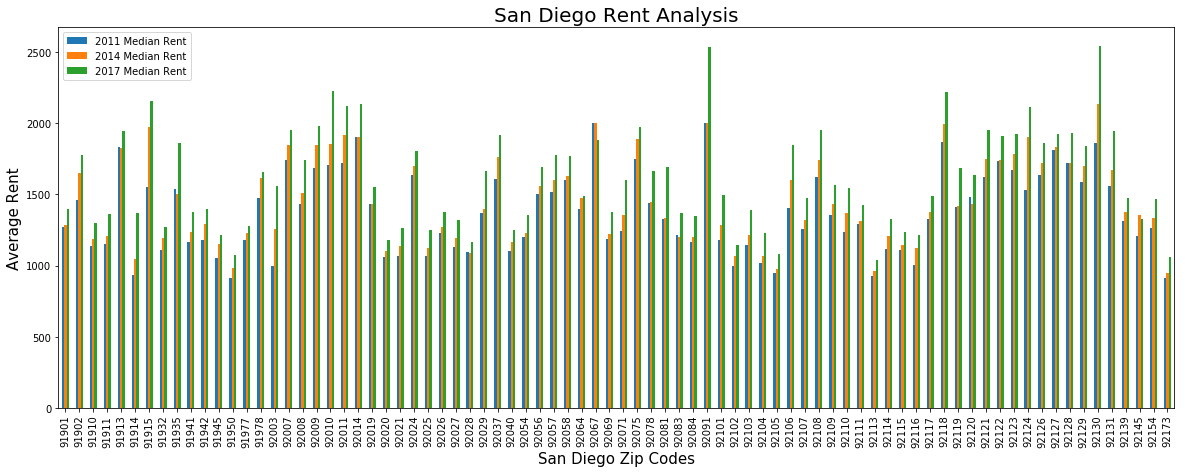

<Figure size 432x288 with 0 Axes>

In [15]:
# Set the index to be "Zip" so they will be used as labels
sd_rent_df = sd_rent_df.set_index("Zip")

# Use DataFrame.plot() to create a bar chart of the data
sd_rent_df.plot(kind="bar", figsize=(20,7))

# Set chart properties
plt.title("San Diego Rent Analysis", fontsize=20)
plt.xlabel("San Diego Zip Codes", fontsize=15)
plt.ylabel("Average Rent", fontsize=15)

plt.savefig("Images/SD_Rent_Chart_2011-2017.png")

plt.show()
plt.tight_layout()

In [16]:
# Rename the relevant columns to this graph
sd_data_df2 = sd_data_df2.rename(columns={"med_home_sale_1_12" : "2012 Median Home Sale",
                                  "med_home_sale_1_15" : "2015 Median Home Sale",
                                  "med_home_sale_1_18" : "2018 Median Home Sale"})
sd_data_df2.head()

,Zip,GEO_NAME,2012 Median Home Sale,2015 Median Home Sale,2018 Median Home Sale,2011 Population,2014 Population,2017 Population,2011 Median Income,2014 Median Income,...,total_units_17,ownocc_units_11,ownocc_units_14,ownocc_units_17,rent_units_11,rent_units_14,rent_units_17,2011 Median Rent,2014 Median Rent,2017 Median Rent
0,91901,Alpine California,390.0,490.0,632.0,16606,18184,18238,77064,81379,...,17813,11259,12843,13642,4845,4939,4171,1274,1284,1397
1,91902,Bonita California,405.0,595.0,632.0,17399,19504,19762,78187,88926,...,19699,14192,15009,13997,3187,4447,5702,1462,1653,1777
2,91910,Chula Vista California,250.0,389.0,508.0,71887,76797,76250,56510,54640,...,75145,38566,37110,36004,32504,38753,39141,1137,1189,1298
3,91911,Chula Vista California,245.0,364.0,470.0,79518,83710,84025,48386,48891,...,83096,42313,41658,42151,36788,41399,40945,1154,1210,1359
4,91913,Chula Vista California,305.0,420.0,517.0,40633,43655,49346,89737,84741,...,49337,29091,31864,35928,11542,11786,13409,1831,1823,1947


In [17]:
# Filter the DataFrame down only to those columns to chart
sd_home_df = sd_data_df2[["Zip","2012 Median Home Sale","2015 Median Home Sale","2018 Median Home Sale"]]
sd_home_df.head()

,Zip,2012 Median Home Sale,2015 Median Home Sale,2018 Median Home Sale
0,91901,390.0,490.0,632.0
1,91902,405.0,595.0,632.0
2,91910,250.0,389.0,508.0
3,91911,245.0,364.0,470.0
4,91913,305.0,420.0,517.0


In [18]:
sd_home_df.drop([78], axis=0).head()

,Zip,2012 Median Home Sale,2015 Median Home Sale,2018 Median Home Sale
0,91901,390.0,490.0,632.0
1,91902,405.0,595.0,632.0
2,91910,250.0,389.0,508.0
3,91911,245.0,364.0,470.0
4,91913,305.0,420.0,517.0


In [19]:
# Merge them Data Frames
sd_data_result = pd.merge(sd_pop_df,
                           sd_income_df, 
                           on="Zip")

sd_data_result2 = pd.merge(sd_data_result,
                           sd_rent_df, 
                           on="Zip")
sd_data_result2.head()

,2011 Population,2014 Population,2017 Population,2011 Median Income,2014 Median Income,2017 Median Income,2011 Median Rent,2014 Median Rent,2017 Median Rent
Zip,,,,,,,,,
91901,16606,18184,18238,77064,81379,90397,1274,1284,1397
91902,17399,19504,19762,78187,88926,92759,1462,1653,1777
91910,71887,76797,76250,56510,54640,59371,1137,1189,1298
91911,79518,83710,84025,48386,48891,52274,1154,1210,1359
91913,40633,43655,49346,89737,84741,87440,1831,1823,1947


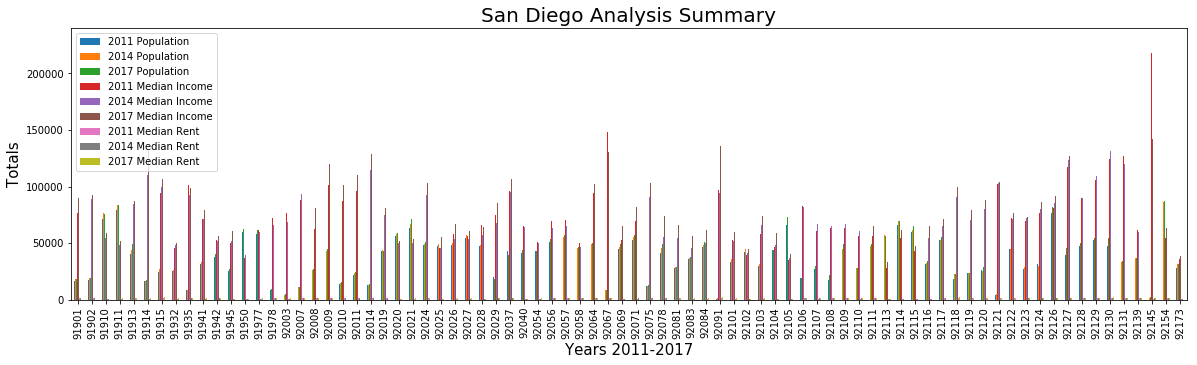

<Figure size 432x288 with 0 Axes>

In [58]:
# Plot multiple columns
multi_plot = sd_data_result2.plot(kind="bar", figsize=(20,5))

# Set chart properties
plt.title("San Diego Analysis Summary", fontsize=20)
plt.xlabel("Years 2011-2017", fontsize=15)
plt.ylabel("Totals", fontsize=15)


plt.show()
plt.tight_layout()

In [21]:
# Rename the relevant columns to this graph
sd_unit_df = sd_data.rename(columns={"total_units_11" : "2011 Total Units",
                                  "total_units_14" : "2014 Total Units",
                                  "total_units_17" : "2017 Total Units"})
sd_unit_df.head()

,zip,GEO_NAME,med_home_sale_1_12,med_home_sale_1_15,med_home_sale_1_18,pop_2011,pop_2014,pop_2017,med_hh_inc_11,med_hh_inc_14,...,2017 Total Units,ownocc_units_11,ownocc_units_14,ownocc_units_17,rent_units_11,rent_units_14,rent_units_17,median_gross_rent_11,median_gross_rent_14,median_gross_rent_17
0,91901,Alpine California,390.0,490.0,632.0,16606,18184,18238,77064,81379,...,17813,11259,12843,13642,4845,4939,4171,1274,1284,1397
1,91902,Bonita California,405.0,595.0,632.0,17399,19504,19762,78187,88926,...,19699,14192,15009,13997,3187,4447,5702,1462,1653,1777
2,91910,Chula Vista California,250.0,389.0,508.0,71887,76797,76250,56510,54640,...,75145,38566,37110,36004,32504,38753,39141,1137,1189,1298
3,91911,Chula Vista California,245.0,364.0,470.0,79518,83710,84025,48386,48891,...,83096,42313,41658,42151,36788,41399,40945,1154,1210,1359
4,91913,Chula Vista California,305.0,420.0,517.0,40633,43655,49346,89737,84741,...,49337,29091,31864,35928,11542,11786,13409,1831,1823,1947


In [29]:
# Filter the DataFrame down only to those columns to chart
sd_unit_df2 = sd_unit_df[["zip","2011 Total Units","2014 Total Units","2017 Total Units"]]
sd_unit_df2.head()

,zip,2011 Total Units,2014 Total Units,2017 Total Units
0,91901,16104,17782,17813
1,91902,17379,19456,19699
2,91910,71070,75863,75145
3,91911,79101,83057,83096
4,91913,40633,43650,49337


In [36]:
unit_11 = sd_unit_df2["2011 Total Units"].sum()
unit_11

2890163

In [37]:
unit_14 = sd_unit_df2["2014 Total Units"].sum()
unit_14

3015499

In [39]:
unit_17 = sd_unit_df2["2017 Total Units"].sum()
unit_17

3115555

In [97]:
pop_11 = sd_pop_df["2011 Population"].sum()
pop_11

2961266

In [98]:
pop_14 = sd_pop_df["2014 Population"].sum()
pop_14

3081748

In [99]:
pop_17 = sd_pop_df["2017 Population"].sum()
pop_17

3179812

In [100]:
# Create a new DataFrame 
units_vs_pop = pd.DataFrame({"2011 Total Units": unit_11,
                                    "2011 Population": [pop_11],
                                    "2014 Total Units": [unit_14],
                                    "2014 Population": [pop_14],
                                    "2017 Total Units": [unit_17],
                                    "2017 Population": [pop_17]})

units_vs_pop

,2011 Total Units,2011 Population,2014 Total Units,2014 Population,2017 Total Units,2017 Population
0,2890163,2961266,3015499,3081748,3115555,3179812


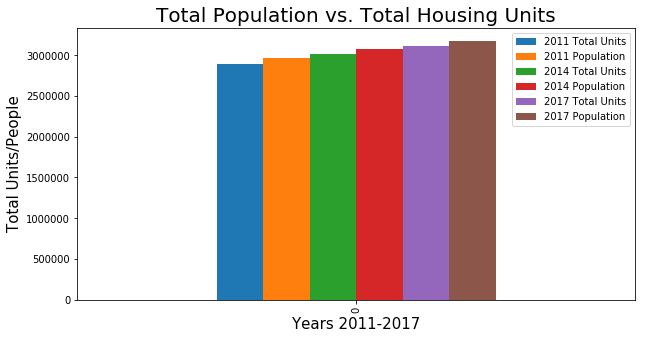

<Figure size 432x288 with 0 Axes>

In [101]:
# Plot multiple columns 
multi_plot2 = units_vs_pop.plot(kind="bar", figsize=(10,5))


# Set chart properties
plt.title("Total Population vs. Total Housing Units", fontsize=20)
plt.xlabel("Years 2011-2017", fontsize=15)
plt.ylabel("Total Units/People", fontsize=15)


plt.savefig("Images/SD_Population_vs_TotalUnits_Chart_2011-2017.png")
plt.show()
plt.tight_layout()